# Baseball Prediction and Pythagorean expectations




In [76]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import gamma, factorial
from datetime import datetime
import statsmodels.api as sm
import statistics
import time
import pemod as pe


In [86]:
# parameters
n_sim      = 10         # number of simulations 
pe_exp     = 1.83        # exponent to compute PE
shape      = 1.83        # common shape parameter of the Weibull dist.
pe_method  = "basic"     # {basic, davenport, smyth}
tol_method = 2           # {1, 2}: 1(2) is without(with) intercept
sim_method = "basic"      # {"basic", "bayes", "opp", "both"}: bayesian updating for scale param; include opponent strength 
opp_param  = 0.5        # reduction in scale param. associated with a strong opponent
rs_0       = 4           # expected runs in week 1



In [87]:
# set tolerance parameters 
season_data = pe.data_read(2010)
tol_prm, bs = pe.params(season_data, pe_exp, shape, rs_0, method = tol_method)
eps1 = np.round(np.mean(tol_prm["eps_1"]), 4)
eps2 = np.round(np.mean(tol_prm["eps_2"]), 4)


In [ ]:
sim_method = "opp"     # {"basic", "bayes", "opp", "both"}: bayesian updating for scale param; include opponent strength 
n_sim      = 400        # number of simulations 
b_score = pd.Series(index = range(2010, 2023))

start = time.time()

eps1 = 1.5
eps2 = 0.5

for year in range(2010, 2015):
    print("Year:  ", year)
    season_data = pe.data_read(year)
    
    # bayesian updating
    pr1, scale_bayes = pe.params(season_data, pe_exp, shape, rs_0)
       
    # simulate 
    sim_g, rej = pe.season_sim(season_data, scale_bayes, n_sim, eps1, eps2, shape, pe_method, sim_method, opp_param)
    #print(len(sim_g))
    #print(sum(sim_g["prob"]))
    #print(' ')
    #print(sim_g["prob"])
    #print(' ')
    
    # prediction
    #pred = pd.Series(sim_g[sim_g["res(team_1)"]==1]["prob"].sum(), index = season_data.index)

    
    # Brier Score
    b_score[year] = pe.bscore(sim_g, season_data["team1_win"])
    #print(b_score)
    

finish = time.time()

print("run time:", (finish-start)/60, "minutes." )

C:\Users\jgsch\AppData\Local\Temp\ipykernel_29804\2020166535.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  b_score = pd.Series(index = range(2010, 2023))


Year:   2010
Year:   2011
Year:   2012


In [92]:
sim_g

array([0.50309474, 0.57382024, 0.77137377, ..., 0.5929342 , 0.57804832,
       0.43144719])

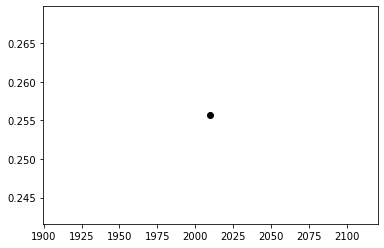

In [93]:
plt.plot(b_score, 'ko')

In [90]:
b_score

2010    0.336904
2011         NaN
2012         NaN
2013         NaN
2014         NaN
2015         NaN
2016         NaN
2017         NaN
2018         NaN
2019         NaN
2020         NaN
2021         NaN
2022         NaN
dtype: float64